In [1]:
import gym
from mc_evaluation import DirectEvaluator, MonteCarloEvaluator, get_bias_variance
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
default_optimal_action = [1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0]
slippery_optimal_action = [0, 3, 0, 3, 0, 1, 0, 0, 3, 1, 0, 1, 2, 2, 1, 0]

### Детерминированное окружение, случайная и оптимальная политика.

In [6]:
env = gym.make('frozen_lake:fall-v0', map_name='small')
env.reset()
policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
default_optimal_policy = np.zeros_like(policy)
for s, a in enumerate(default_optimal_action):
    default_optimal_policy[s, a] = 1.0
slippery_optimal_policy = np.zeros_like(policy)
for s, a in enumerate(slippery_optimal_action):
    slippery_optimal_policy[s, a] = 1.0

In [9]:
mc_eval = MonteCarloEvaluator(env=env)
print('Случайная политика')
v = mc_eval.first_visit_evaluation(policy=policy)
print('first visit')
print(v)

v = mc_eval.every_visit_evaluation(policy=policy)
print('every visit')
print(v)

Случайная политика
first visit
[-0.00132019 -0.02459744 -0.00265597 -0.02816914 -0.02551713 -0.00335298
 -0.05114286 -0.04942018 -0.02783118 -0.02858467 -0.01699266  0.22399621
 -0.05717271 -0.01740135  0.2283388   0.        ]
every visit
[-0.00132643 -0.02537396 -0.00270248 -0.02568402 -0.02629924 -0.00331268
 -0.05155053 -0.04826736 -0.02900438 -0.02709389 -0.01408339  0.21254283
 -0.05304036 -0.02190526  0.25958423  0.        ]


In [10]:
mc_eval = MonteCarloEvaluator(env=env)
print('Оптимальная политика')
v = mc_eval.first_visit_evaluation(policy=default_optimal_policy)
print('first visit')
print(v)

v = mc_eval.every_visit_evaluation(policy=default_optimal_policy)
print('every visit')
print(v)

Оптимальная политика
first visit
[1.e-05 0.e+00 0.e+00 0.e+00 1.e-04 0.e+00 0.e+00 0.e+00 1.e-03 1.e-02
 0.e+00 0.e+00 0.e+00 1.e-01 1.e+00 0.e+00]
every visit
[1.e-05 0.e+00 0.e+00 0.e+00 1.e-04 0.e+00 0.e+00 0.e+00 1.e-03 1.e-02
 0.e+00 0.e+00 0.e+00 1.e-01 1.e+00 0.e+00]


### Стохастическое окружение, случайная и оптимальная политика.

In [11]:
env = gym.make('frozen_lake:fall-v0', map_name='small', action_set_name='slippery')
mc_eval = MonteCarloEvaluator(env=env)
print('Случайная политика')
v = mc_eval.first_visit_evaluation(policy=policy)
print('first visit')
print(v)

v = mc_eval.every_visit_evaluation(policy=policy)
print('every visit')
print(v)

Случайная политика
first visit
[-0.0015524  -0.02731024 -0.00256264 -0.02888525 -0.02596571 -0.00326502
 -0.05169089 -0.04674    -0.0261875  -0.02674501 -0.01786377  0.20939861
 -0.05512185 -0.0207719   0.26685007  0.        ]
every visit
[-0.00136539 -0.02520749 -0.00263788 -0.02766585 -0.02631028 -0.00316365
 -0.05134839 -0.04894194 -0.02781102 -0.02608012 -0.01542939  0.19731053
 -0.05365897 -0.02183163  0.2470322   0.        ]


In [12]:
print('Оптимальная политика')
v = mc_eval.first_visit_evaluation(policy=default_optimal_policy)
print('first visit')
print(v)

v = mc_eval.every_visit_evaluation(policy=default_optimal_policy)
print('every visit')
print(v)

Оптимальная политика
first visit
[-0.00242451 -0.03365858 -0.00485428 -0.03494387 -0.03577245 -0.0038229
 -0.06969987 -0.02716548 -0.03725741 -0.00159407 -0.01239753  0.29385193
 -0.03443916  0.01008091  0.31953418  0.        ]
every visit
[-0.00238583 -0.03455196 -0.00441614 -0.03612642 -0.03644158 -0.0035357
 -0.06658766 -0.02771268 -0.03678505 -0.00123262 -0.0109106   0.30146592
 -0.03606413  0.01211067  0.34951839  0.        ]


### Сравнение Bias для first и every visit относительно прямого решения и variance для first и every visit policy evaluation

In [12]:
count_runs = 100
biases = pd.DataFrame()
variances = pd.DataFrame()

for env_size in ['small', 'medium', 'large', 'huge']:
    print(env_size)
    env = gym.make('frozen_lake:fall-v0', map_name= env_size)
    cur_policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
    first_bias, first_var = get_bias_variance(count_runs=count_runs,
                                  eval_type='first_visit', env=env, policy=cur_policy, max_episode_len=100000)
    every_bias, every_var = get_bias_variance(count_runs=count_runs,
                                  eval_type='every_visit', env=env, policy=cur_policy, max_episode_len=100000)
    biases = biases.append({
        'env_size': env_size,
        'first visit': first_bias,
        'every visit': every_bias
    },ignore_index=True)

    variances = variances.append({
        'env_size': env_size,
        'first visit': first_var,
        'every visit': every_var
    },ignore_index=True)


biases.set_index('env_size', inplace=True)
variances.set_index('env_size', inplace=True)

small
medium
large
huge


<AxesSubplot:title={'center':'Bias'}, xlabel='env_size'>

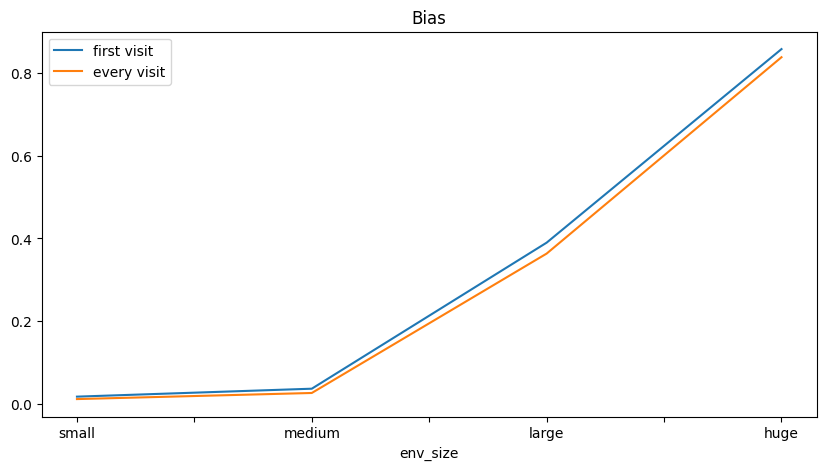

In [13]:
biases.plot(figsize=(10, 5), title='Bias')

<AxesSubplot:title={'center':'Variance'}, xlabel='env_size'>

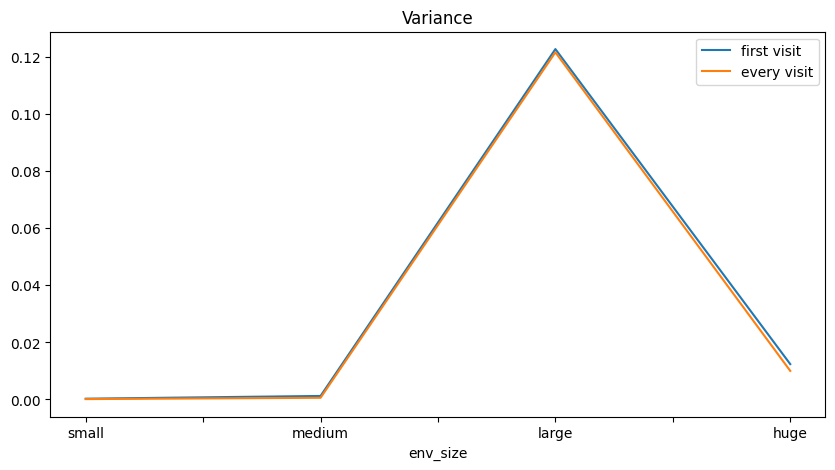

In [14]:
variances.plot(figsize=(10, 5), title='Variance')